# CAPSTONE PROJECT 2: A COMPUTER VISION MODEL WHICH DETECTS BONE FRACTURES IN THE UPPER EXTREMITIES NAMELY: WRISTS, FOREARMS, UPPER ARM, & SHOULDER FRACTURES
#### DATA WRANGLING

In [2]:
# import necessary modules for Data Wrangling, namely Pandas, numpy, & motplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import extra modules as needed here:
import yaml
import os
import torch
from torch import nn
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [7]:
# set up cuda environment
torch.cuda.empty_cache()

BS = 16
LR = 0.00005
epochs = 20
IS = 256
D = 'cuda' if torch.cuda.is_available() else 'cpu'

# set up global variables
num_classes = 7
classes = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
c2l = {k:v for k,v in list(zip(classes,list(range(num_classes))))}
l2c = {v:k for k,v in c2l.items()}

# Project Main Directory path
dir_path = r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2"

# Train Data Paths
train_dir_path = r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\train"
train_img_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\train\images"))
train_target_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\train\labels"))

# Valid Data Paths
val_dir_path = r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\valid"
val_img_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\valid\images"))
val_target_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\valid\labels"))

# Test Data Paths
test_dir_path = r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\test"
test_img_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\test\images"))
test_target_paths = sorted(os.listdir(r"C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_2\Data\test\labels"))

Verify that image data can be accessed and presented.

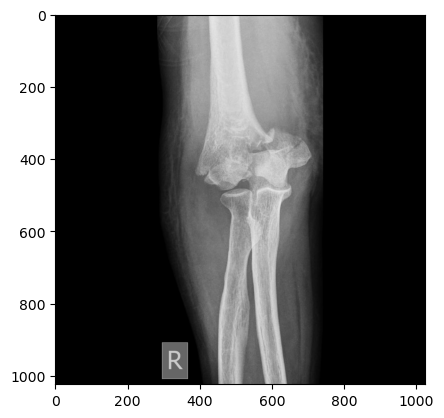

In [10]:
ip=os.path.join(train_dir_path,'images',train_img_paths[0])
image=cv2.imread(ip)

plt.imshow(image)
plt.show()